In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler , Normalizer ,MinMaxScaler , normalize

from sklearn.model_selection import train_test_split , StratifiedKFold 
from sklearn.model_selection import cross_val_score ,cross_val_predict

from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB ,MultinomialNB ,BernoulliNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,f1_score
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable

In [2]:
feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                'BMI','PedigreeFn','Age','class']

In [10]:
df = pd.read_csv('../data/pima-indians-diabetes.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',
                5:'BMI',6:'PedigreeFn',7:'Age',8:'class'},inplace=True)

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'PedigreeFn', 'Age', 'class'],
      dtype='object')

In [16]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [17]:
df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'PedigreeFn', 'Age', 'class'],
      dtype='object')

## Check Null Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
PedigreeFn       768 non-null float64
Age              768 non-null int64
class            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFn       0
Age              0
class            0
dtype: int64

In [21]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFn       0
Age              0
class            0
dtype: int64

# Count Zeros

In [22]:
df.isin([0]).sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
PedigreeFn         0
Age                0
class            500
dtype: int64

In [ ]:
#handling missing data 

# df.glucose.replace(0,np.nan,inplace = True)
# df.insulin.replace(0,np.nan,inplace = True)
# df.blood_pressure.replace(0,np.nan,inplace = True)
# df.bmi.replace(0,np.nan,inplace = True)
# df.skin_thickness.replace(0,np.nan,inplace = True)
# df.age.replace(0,np.nan,inplace = True)
# df.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

## Exploratory

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
PedigreeFn       float64
Age                int64
class              int64
dtype: object

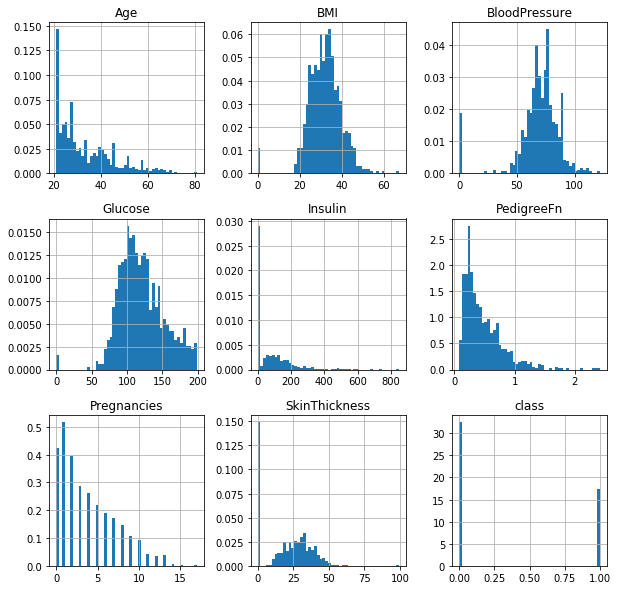

In [25]:
df.hist(density=True,bins=50 ,figsize = (10,10))
pass

In [ ]:
sns.pairplot(df ,vars=df.columns[:-1])
plt.show()

In [26]:
df.cov(min_periods=12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
PedigreeFn,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
class,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


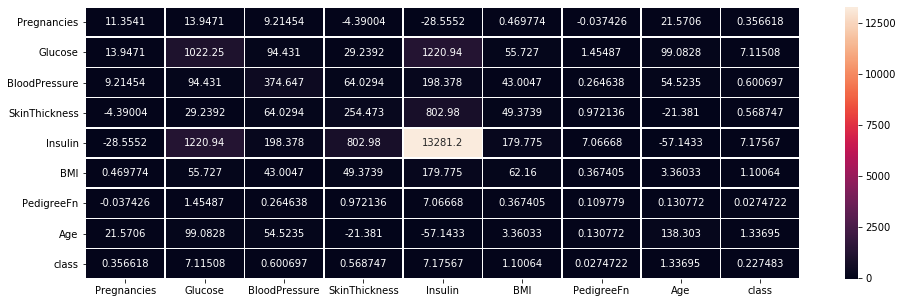

In [27]:
covMatrix = df.cov()
plt.figure(figsize = (16,5))
sns.heatmap(covMatrix, annot=True, fmt='g',linewidths=.5)

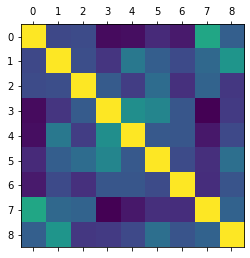

In [28]:
plt.matshow(df.corr())

In [29]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
PedigreeFn,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [30]:
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,class
Pregnancies,1,0.129459,0.141282,-0.0816718,-0.0735346,0.0176831,-0.0335227,0.544341,0.221898
Glucose,0.129459,1,0.15259,0.0573279,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.15259,1,0.207371,0.0889334,0.281805,0.0412649,0.239528,0.0650684
SkinThickness,-0.0816718,0.0573279,0.207371,1,0.436783,0.392573,0.183928,-0.11397,0.0747522
Insulin,-0.0735346,0.331357,0.0889334,0.436783,1,0.197859,0.185071,-0.042163,0.130548
BMI,0.0176831,0.221071,0.281805,0.392573,0.197859,1,0.140647,0.0362419,0.292695
PedigreeFn,-0.0335227,0.137337,0.0412649,0.183928,0.185071,0.140647,1,0.0335613,0.173844
Age,0.544341,0.263514,0.239528,-0.11397,-0.042163,0.0362419,0.0335613,1,0.238356
class,0.221898,0.466581,0.0650684,0.0747522,0.130548,0.292695,0.173844,0.238356,1


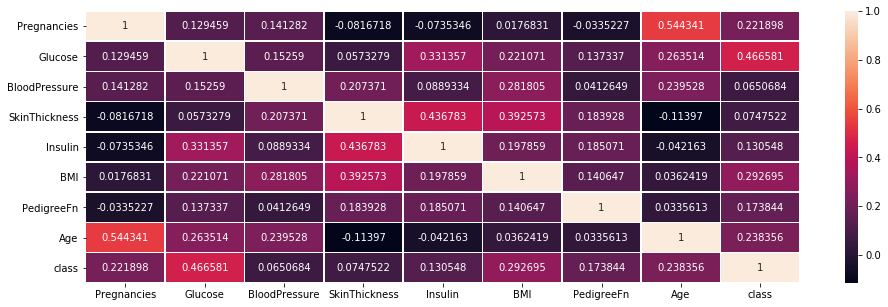

In [31]:
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True, fmt='g',linewidths=.5)

In [136]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [35]:
df_skinNa = df['SkinThickness'].replace(0, np.nan,inplace=True)

In [137]:
df['Insulin'].replace(0, np.nan,inplace=True)

In [138]:
df.isin([0]).sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness      0
Insulin            0
BMI               11
PedigreeFn         0
Age                0
class            500
dtype: int64

In [139]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)

df_filled = imputer.fit_transform(df)

In [140]:
type(df_filled)

numpy.ndarray

In [141]:
df_kimp = pd.DataFrame(df_filled)

In [143]:
df_kimp[4]

0      179.50
1       61.00
2      163.75
3       94.00
4      168.00
        ...  
763    180.00
764    158.75
765    112.00
766    114.00
767     70.75
Name: 4, Length: 768, dtype: float64

In [144]:
df_kimp.isin([0]).sum()

0    111
1      5
2     35
3      0
4      0
5     11
6      0
7      0
8    500
dtype: int64

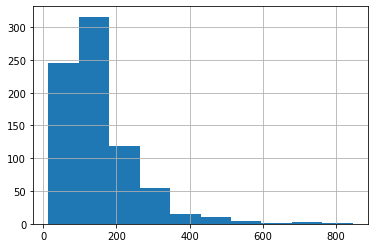

In [145]:
df_kimp[4].hist()

In [146]:
y = df_kimp.iloc[:,8]
X = df_kimp.iloc[:,:8]

X.shape , y.shape
# X.head(20)

((768, 8), (768,))

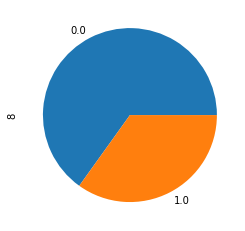

In [147]:
y.value_counts()

y.value_counts().plot.pie(subplots=True)
pass

## Scaling Normalization

In [148]:
X.head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.00,179.50,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00,61.00,26.6,0.351,31.0
2,8.0,183.0,64.0,28.75,163.75,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00,94.00,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00,168.00,43.1,2.288,33.0


In [149]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
X_scaled.shape

(768, 8)

In [203]:
X_norm = normalize(X, norm='l2')

In [ ]:
transformer = Normalizer().fit(X)  # fit does nothing.
transformer

X_normz= transformer.transform(X)

In [ ]:
## Testing if scaling changes correlation
npdf = pd.DataFrame(data=X_scaled)
npcorrdf = npdf.corr()
npcorrdf.style.background_gradient(cmap='coolwarm')

In [ ]:
y = np.array(y)
type(y) , type(X_scaled)

## PCA NUmber of Components Selection

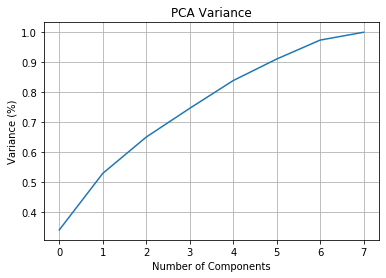

In [69]:
#Fitting the PCA algorithm with our Data
#Plotting the Cumulative Summation of the Explained Variance
pca = PCA().fit(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA Variance')
plt.grid()
plt.show()

## PCA

In [ ]:
pca = PCA(n_components=7)
X_pca = pca.fit(X_scaled).transform(X_scaled)

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio : %s' % str(pca.explained_variance_ratio_))
X_pca.shape

## Train Test Split

In [210]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X_norm)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y, stratify=y, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


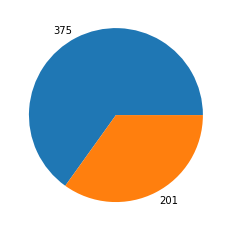

In [217]:
m = np.bincount(y_test)
n = np.bincount(y_train)
# plt.pie(m,labels=m)  
plt.pie(n,labels=n)
pass

## XGB

In [218]:
model=xgb.XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5885416666666666

In [214]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [ ]:
# %%capture cap --no-stderr
for i in np.around((np.arange (0.1,1.1,.1)),decimals=1):
    for j in np.around((np.arange (0.3,1.0,.1)),decimals=1):
        model= xgb.XGBClassifier(learning_rate=0.5,random_state=1,subsample=0.7,
                                 gamma=0.2,scale_pos_weight=0.2,reg_lambda=0,reg_alpha=0.8 ,eval_metric='auc')
        model.fit(X_train, y_train)
        train = round(model.score(X_train, y_train),2)
        test = round(model.score(X_test,y_test),2)
        predicted_labels = model.predict(X_test)
        Accuracy = round(accuracy_score(y_test, predicted_labels),2)
        F1score = round(f1_score(y_test, predicted_labels),2)
        Recall = round(recall_score(y_test, predicted_labels),2)
        Precision = round(precision_score(y_test, predicted_labels),2)
        t = PrettyTable([ 'Learningrate','gamma','Train_score','Test_score','Accuracy','F1score','Recall','Precision'])
        t.add_row([i, j,train,test,Accuracy,F1score,Recall,Precision])
#         t.add_row(['j', j])
        print(t)
    
# with open('output.txt', 'w') as f:
#         f.write(cap.stdout)

## Confusion Matrix Plot

In [215]:
model_xgb_tuned = xgb.XGBClassifier(learning_rate=0.5,random_state=1,subsample=0.7,
                                 gamma=0.2,scale_pos_weight=0.2,reg_lambda=0,reg_alpha=0.8 ,eval_metric='auc')

model_xgb_tuned.fit(X_train, y_train)
model_xgb_tuned.score(X_test,y_test)

0.671875

In [208]:
predicted_labels = model_xgb_tuned.predict(X_test)

In [209]:
train_score = round(model.score(X_train, y_train),2)
test_score = round(model.score(X_test,y_test),2)
Accuracy = round(accuracy_score(y_test, predicted_labels),2)
F1score = round(f1_score(y_test, predicted_labels),2)
Recall = round(recall_score(y_test, predicted_labels),2)
Precision = round(precision_score(y_test, predicted_labels),2)
t = PrettyTable(['Train_score','Test_score','Accuracy','F1score','Recall','Precision'])
t.add_row([train_score,test_score,Accuracy,F1score,Recall,Precision])
print(t)

+-------------+------------+----------+---------+--------+-----------+
| Train_score | Test_score | Accuracy | F1score | Recall | Precision |
+-------------+------------+----------+---------+--------+-----------+
|     0.9     |    0.7     |   0.67   |   0.38  |  0.28  |    0.56   |
+-------------+------------+----------+---------+--------+-----------+


In [199]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_labels)
print(cm)

[[113  12]
 [ 65   2]]


In [182]:
from sklearn.metrics import precision_score, recall_score ,roc_auc_score ,confusion_matrix

precision_score(y_test, predicted_labels)

0.6756756756756757

In [183]:
recall_score(y_test, predicted_labels)

0.373134328358209

In [184]:
roc_auc_score(y_test, predicted_labels)

0.6385671641791044

In [185]:
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

[[113  12]
 [ 42  25]]


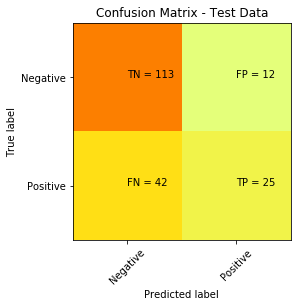

In [186]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [196]:
fpr, tpr, _ = roc_curve(y_test, predicted_labels)
roc_auc = auc(fpr, tpr)

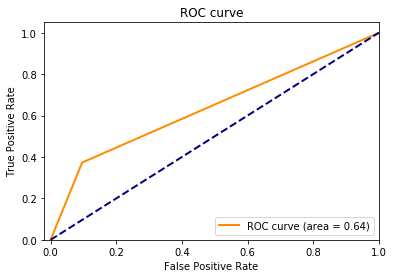

In [188]:
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()